In [1]:
import numpy as np
import pandas as pd
import os
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pwd

'C:\\Users\\samue\\GitHub\\Amazon-Review'

In [3]:
dataset=pd.read_csv("ratings_Electronics.csv",names=['userId', 'productId','Rating','timestamp'])

In [4]:
dataset_original=dataset.copy()

In [5]:
dataset.head(10)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [6]:
dataset.describe()

,Rating,timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [7]:
dataset.shape

(7824482, 4)

In [8]:
dataset.info

<bound method DataFrame.info of                  userId   productId  Rating   timestamp
0         AKM1MP6P0OYPR  0132793040     5.0  1365811200
1        A2CX7LUOHB2NDG  0321732944     5.0  1341100800
2        A2NWSAGRHCP8N5  0439886341     1.0  1367193600
3        A2WNBOD3WNDNKT  0439886341     3.0  1374451200
4        A1GI0U4ZRJA8WN  0439886341     1.0  1334707200
...                 ...         ...     ...         ...
7824477  A2YZI3C9MOHC0L  BT008UKTMW     5.0  1396569600
7824478  A322MDK0M89RHN  BT008UKTMW     5.0  1313366400
7824479  A1MH90R0ADMIK0  BT008UKTMW     4.0  1404172800
7824480  A10M2KEFPEQDHN  BT008UKTMW     4.0  1297555200
7824481  A2G81TMIOIDEQQ  BT008V9J9U     5.0  1312675200

[7824482 rows x 4 columns]>

In [9]:
dataset.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

In [10]:
dataset['Rating'].min()

1.0

In [11]:
dataset['Rating'].max()

5.0

In [12]:
dataset.isnull()

,userId,productId,Rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
7824477,False,False,False,False
7824478,False,False,False,False
7824479,False,False,False,False
7824480,False,False,False,False


<AxesSubplot:>

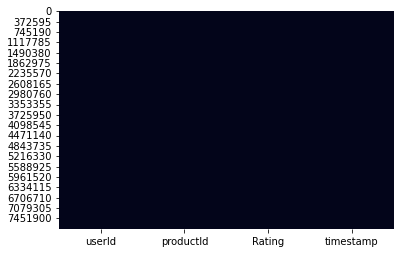

In [13]:
sns.heatmap(dataset.isnull(), cbar=False)

In [14]:
dataset.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

[Text(0, 0.5, 'Total Number of Rating')]

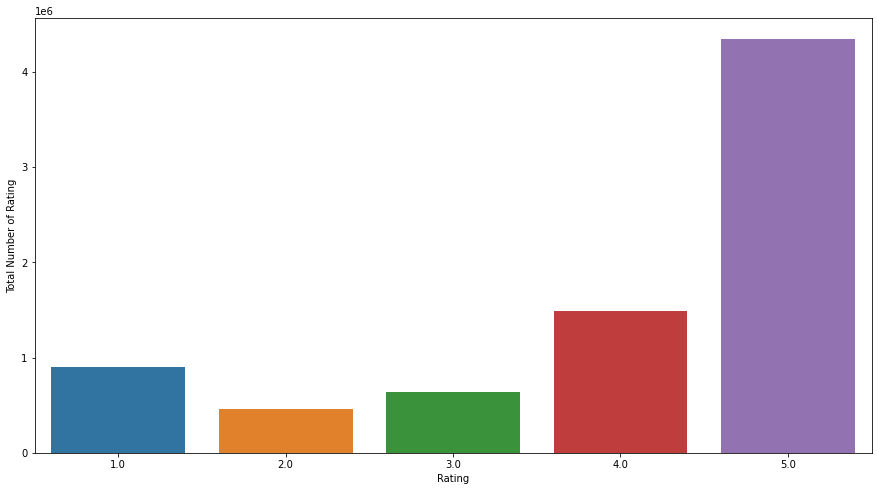

In [15]:
#plt.figure(figsize = (15,8))
ax = sns.countplot(x="Rating", data=dataset)
ax.set(ylabel='Total Number of Rating')

In [16]:
dataset.head(10)

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
5,A1QGNMC6O1VW39,0511189877,5.0,1397433600
6,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
7,A2TY0BTJOTENPG,0511189877,5.0,1395878400
8,A34ATBPOK6HCHY,0511189877,5.0,1395532800
9,A89DO69P0XZ27,0511189877,5.0,1395446400


In [17]:
dataset["Rating"].count()

7824482

In [18]:
len(dataset["productId"].unique())

476002

In [19]:
len(dataset["userId"].unique())

4201696

In [20]:
dataset.drop(['timestamp'], axis=1,inplace=True)

In [24]:
num_of_rate_each_user = dataset.groupby(by='userId')['Rating'].count()

In [28]:
num_of_rate_each_user.sort_values(ascending=False)

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
                 ... 
A2HRB8UOXH92SQ      1
A2HRBA4HO2E4GU      1
A2HRBCM00IDK56      1
A2HRBEBDTIB8MT      1
AZZZY1W55XHZR       1
Name: Rating, Length: 4201696, dtype: int64

In [29]:
num_of_rate_each_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

In [30]:
quantiles = num_of_rate_each_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

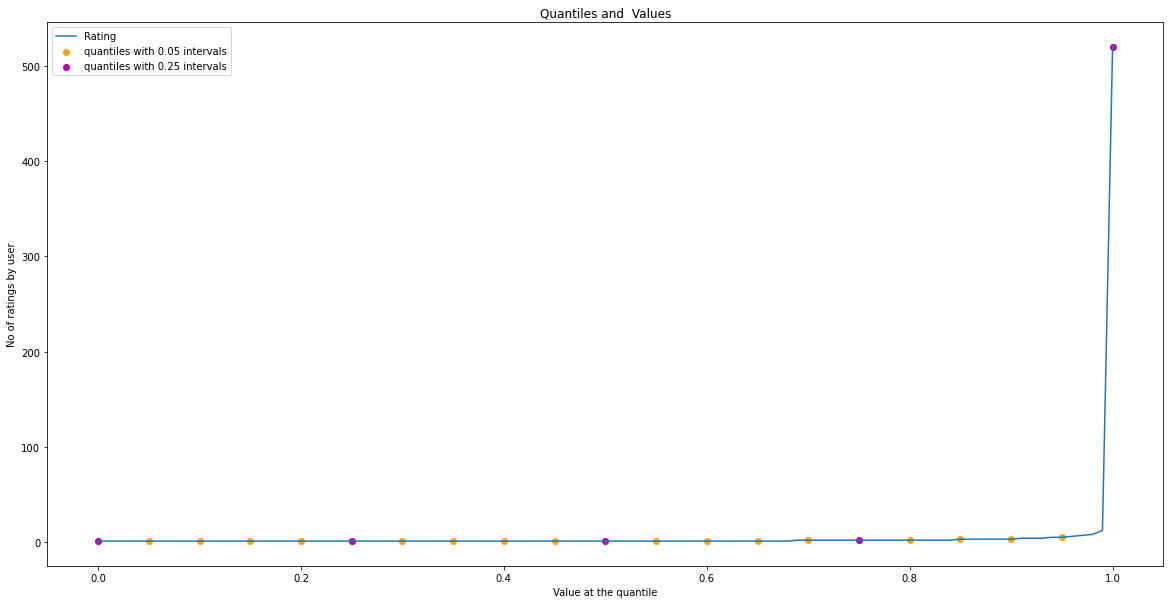

In [31]:
plt.figure(figsize=(20,10))
plt.title("Quantiles and  Values")
quantiles.plot()
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [33]:
sum(num_of_rate_each_user >= 50)

1540